# Determining Airline Prices
By: Chirstopher Kuzemka : [Github](https://github.com/chriskuz/ga_capstone)

## Problem Statement

Aviation is one of the largest industries dominating our global market today. Commercial aviation has made it possible for people to connect with each other in ways that may have been unimaginable over a century ago. However, a lot of thought must be put into the FAA standards and routes that modern planes must make today to make such connections possible.

Consider the case example where a startup airliner, known as "Kruze" (pronounced like "Cruise"), wants to establish itself as a top competitor against existing airliners today. A part of this startup process focuses on understanding the costs that will come into play when managing flights. Our job as data scientists today is to help Kruze determine the minimum threshold cost the airliner must charge their passengers in order to break even with a profit. To do this, we are going to analyze seven different locations where Kruze would like to establish themselves and examine existing flight route data as well as existing flight ticket prices (as a prediction) to help us create a supervised learning model. 

To start, we will approach the project with the intention of expressing a minimum proof of concept. With such introduction, we will make some limitations to our study and decrease the potential for scope increase by:

- only analyzing the seven airports as destination hubs for different flights: 
    - New York John F. Kennedy Airport (KJFK)
    - Chicago O'Hare International Airport (KORD)
    - Los Angeles International Airport (KLAX) 
    - Houston George Bush Intercontinental Airport (KIAH)
    - Miami International Airport (KMIA)
    - Hartsfield-Jackson Atlanta International Airport (KATL)
    - Portland International Airport (KPDX)
- assuming external costs from the study (including maintenance/crew salary) to be negligible
- using price data from future flights as opposed to previous flights as previous flight pricing is not readily available


All current assumptions labeled are set to allow us to achieve (or attempt to achieve) our goal within a certain time frame, as Kruze is requiring an answer from us quickly! With this in mind, we will consider discussing how such assumptions can contribute to any error throughout our study, as well as remind ourselves that integrating negated features for future work may actually be very beneficial to us in achieving a stronger prediction.

As we are working with what is considered to be a continuous variable, we will analyze common price trends utilizing a supervised regression model, such as Linear Regression, KNNRegression, Bagging Regression, and Decision Tree Regression. We will ultimately be using the Mean Absolute Error against our predictions to help us gauge how well our selected model predicts the price and discuss what issues may be observed from the limitations of this study. The Mean Absolute Error seems the most appropriate to analyze pricing values as the error is in the scale of our predictions and is much clearer for anyone to understand the general error of the model in absolute terms. 



## Executive Summary

A study was conducted on flight data and flight pricing data to help the startup airliner, known as Kruze, determine ticket price thresholds for passengers. The data was gathered through an API, produced by, FlightAware.com known as "FlightXML2." FlightXML2 is a popular API utilized by various companies affiliated with the airline and travel business to observe different types of flight data. With this API, a search was conducted on the seven destination airports explained in the problem statement above where up to 15 flights were searched on a real-time basis on a given day in May. These 15 different flights (origin-destination combinations) per airport were then searched through the API again to determine their May 2020 schedule on an 8 hour frequency. The search ultimately costed the data scientist approximately $120. The data returned were different departure and arrival times for every flight combination discovered within the month of May, including airline data, aircraft type data, technical details, and more. 

To gather quotes on flights, the Skyscanner API was utilized. It was impossible to determine the pricing data of past flights, so future quotes were substituted for the flight pricing -- this meant past flight information was utilizing future pricing. The Skyscanner search analyzed the best monthly quote for every origin-destination combination from June 2020 to December 2021. Various features including actual city names, carrier id's, and country information was also gathered from this quotes search. This dataframe containing quotes was combined with the flight scheduling dataframe to create a large dataframe directly meant for modeling. Through some bootstrapping methods, where different prices were sampled randomly onto the flight scheduling dataframe, an approximate 5,000 row dataframe was ultimately utilized to show pattern relationships between features and our main target, the pricing.

After all the arduous cleaning necessary to create a dataframe for modeling, four different supervised models were implemented: Linear Regression, KNN Regression, Bagging Regression, and Decision Tree Regression. The Bagging regression model was considered to be the best performing model out of all of the models due to the smaller differences found in the mean absolute error scores in the training, testing, and cross validated scores. With all this mentioned, the study has room for improvement. Much bias exists in the data, mainly regarding the role the Covid-19 pandemic has played, as well as how such bias combatted by implementing other biases into the search. The bootstrapping method was also contributing to inaccuracies with regard to proper carrier identification implementation. 

## Table of Contents
[1.00 Data Loading](#1.00-Data-Loading)

- [1.01 Flight Tracking Data](#1.01-Flight-Tracking-Data)

- [1.02 Pricing Data](#1.02-Pricing-Data)

[2.00 Superficial Analysis and History](#2.00-Superficial-Analysis-and-History)

- [2.01 Quick Check](#2.01-Quick-Check)

- [2.02 Data Documentation Exploration](#2.02-Data-Documentation-Exploration)

[3.00 Data Cleaning](#3.00-Data-Cleaning) 

- [3.01 Flight Data](#3.01-Flight-Data)

- [3.01 Price Data](#3.02-Price-Data)

- [3.03 Creating the Model Dataframe](#3.03-Creating-the-Model-Dataframe)

[4.00 Exploratory Data Analysis and Visualization](#4.00-Exploratory-Data-Analysis-and-Visualization)

[5.00 Modeling](#5.00-Modeling)

- [5.01 Model Preparation](#5.01-Model-Preparation)

- [5.02 Training Modeling](#5.02-Training-Modeling)

- [5.03 Model Selection and Evaluation](#5.03-Model-Selection-and-Evaluation)

[6.00 Conclusions and Future Work](#6.00-Conclusions-and-Future-Work)

[7.00 References](#7.00-References)

## Data Dictionary

|__Data Variable__|__Type__|__Significance__|
|---|---|---|
|`ident`|__String Object__|*identification of a flight*|
|`actual_ident`|__String Object__|*original identification of a codeshared flight*|
|`departuretime`|__String Object__|*departure time of flight including date, hours, and minutes*|
|`arrival_time`|__String Object__|*arrival time of flight including date, hours, and minutes*|
|`origin`|__String Object__|*origin ICAO code*|
|`destination`|__String Object__|*destination ICAO code*|
|`aircrafttype`|__String Object__|*type of aircraft flown*|
|`meal_service`|__String Object__|*type of meal service provided on flight*|
|`seats_cabin_first`|__Integer__|*number of first class seats available*|
|`seats_cabin_business`|__Integer__|*number of business class seats available*|
|`seats_cabin_coach`|__Integer__|*number of coach class seats available*|
|`origin_IATA`|__String Object__|*origin IATA code*|
|`destination_IATA`|__String Object__|*destination IATA code*|
|`flight_duration`|__String Object__|*flight duration in seconds*|
|`MinPrice`|__Float__|*minimum price for a ticket on the flight*|
|`Direct`|__Boolean Object__|*boolean state if the route was direct or had stops*|
|`OriginName`|__String Object__|*origin airport name*|
|`OriginCityName`|__String Object__|*origin city name*|
|`OriginCountryName`|__String Object__|*origin country name*|
|`DestinationName`|__String Object__|*destination airport name*|
|`DestinationCityName`|__String Object__|*destination city name*|
|`DestinationCountryName`|__String Object__|*destination country name*|
|`CarrierName`|__String Object__|*carrier name affiliated with quote*|

# 1.00 Data Loading

In [110]:
import pandas as pd #imports the pandas package
import numpy as np #imports the numpy package
import matplotlib.pyplot as plt #imports the matplotlib plotting package
import seaborn as sns #imports the seaborn package
from matplotlib.dates import DateFormatter

import json #imports the json package
import ast #imports the ast package

import datetime #imports the datetime package

import copy as cp #imports copy

from sklearn.linear_model import LinearRegression, LogisticRegression #imports regression modeling 
from sklearn.neighbors import KNeighborsRegressor #imports the KNN Regressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor #imports Bagging Regressor, RandomForest Regressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor #imports Decision Tree regressor
from sklearn.model_selection import train_test_split, cross_val_score #imports data splitting for modeling
from sklearn.metrics import mean_absolute_error #imports mean_absolute_error metric
from sklearn.preprocessing import StandardScaler #imports the StandardScaler metirc
import sklearn.metrics

In [111]:
random_state_value = 2020 #sets the random state for randomized methods in the study

## 1.01 Flight Tracking Data

In [112]:
current_flights = pd.read_csv('../data/current_flights.csv') #reads the current_flights csv
flight_combinations = pd.read_csv('../data/flight_combinations.csv') #reads the flight_combinations csv
flight_schedules = pd.read_csv('../data/flight_schedules.csv') #reads the flight_schedules csv

## 1.02 Pricing Data

In [113]:
monthly_pricing_2021 = pd.read_csv('../data/2021_monthly_pricing2.csv') #reads the 2021_monthly_pricing csv
june2020_to_december2020_monthlyprice = pd.read_csv('../data/june2020_to_december2020_monthlyprice.csv') #reads the 2020

## 1.03 TSA Data

In [114]:
tsa_checkpoint = pd.read_excel('../data/tsa_checkpoint_travel.xlsx', sheet_name= 0, header = 1, usecols = 'A:C', names = ['Date', 'Total Traveler Throughput', 'Total Traveler Throughput (1 year ago - same weekday)'])
tsa_confirmed = pd.read_excel('../data/tsa_confirmed_cases.xlsx', sheet_name = 0, header = 0, usecols = 'A:E')

# 2.00 Superficial Analysis and History

## 2.01 Quick Check

In [115]:
def quick_check(dataframe):
    print("-------------------------------------------------------------------------------------------------")
    print(f"The head of your input dataframe is dataframe is:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe.head()) #checks the head of the dataframe
    print("-------------------------------------------------------------------------------------------------")
    print(f"The tail of your input dataframe is:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe.tail()) #checks the tail of the dataframe
    print("-------------------------------------------------------------------------------------------------")
    print(f"The shape of the dataframe is {dataframe.shape[0]} rows and {dataframe.shape[1]} columns.") #checks the shape of the dataframe
    print("-------------------------------------------------------------------------------------------------")
    print("The below shows whether there exist nulls in our dataframe or not:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe.isnull().any()) #checks the null status of the current_flights dataframe
    print("-------------------------------------------------------------------------------------------------")
    print("The below shows the useful information to be aware of when exploring this input dataframe:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe.info()) #checks the null status of the current_flights dataframe

The above function is created to conveniently conduct a quick check on the dataframe for the reader/user. Through it, we will able to see the __head__, __tail__, __shape__, __null presence__, and __important dataframe information__.

### Current Flights Data

In [116]:
quick_check(current_flights) #performs a quick check on the current_flights dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0                      faFlightID   ident prefix  type  suffix  \
0           0       DAL333-1590465975-fa-0008  DAL333    NaN  A321     NaN   
1           1  KLM601-1590468354-airline-0005  KLM601    NaN  B77W     NaN   
2           2       VIR607-1590664542-ed-0002  VIR607    NaN  B789     NaN   
3           3       DAL702-1590465982-fa-0006  DAL702    NaN  A321     NaN   
4           4  ACA572-1590468353-airline-0278  ACA572    NaN  A319     NaN   

  origin destination  timeout   timestamp  ...  lowLatitude  highLongitude  \
0   KATL        KLAX        0  1590716390  ...     32.94676      -84.44664   
1   EHAM        KLAX        0  1590711509  ...     33.95142        4.71741   
2   EGLL        KLAX        0  1590711368  ...    

#### Key takeaways fromm the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 105 rows and 26 columns. Not all columns are revealed in the head and tail of the function. 

- Our dataframe contains nulls. 

- Most of the values in our dataframe are numerical. 

### Flight Combinations Data

In [117]:
quick_check(flight_combinations) #performs a quick check on the flight combinations dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0 origin destination  0
0           0   CYHM        KJFK  1
1           1   CYUL        KORD  1
2           2   CYVR        KLAX  1
3           3   CYYZ        KIAH  2
4           4   CYYZ        KJFK  1
-------------------------------------------------------------------------------------------------
The tail of your input dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
    Unnamed: 0 origin destination  0
55          55   KBUR        KPDX  1
56          56   KBWI        KPDX  1
57          57   KCVG        KPDX  1
58          58   KCVO        KPDX  2
59          59   KDEN        KPDX  3
---------------------------------------------------------------------------------

#### Key Takeaways form the above output:

- There is an `Unnamed: 0` column which does not need to be included. 

- The dataframe is 60 rows and has 4 columns. 

- The column named `0` is the final column and shows the frequency of the flight combination shown in the dataframe. 

- There are no nulls. 

- All of the values are numerical. 

### Flight Schedules Data

In [118]:
quick_check(flight_schedules) #performs a quick check on the dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0    ident actual_ident  departuretime  arrival_time origin  \
0           0  UAL4282      ASQ4282     1588330800    1588340820   CYUL   
1           1  ACA7591      AC27591     1588335000    1588343880   CYUL   
2           2  UAL8371      AC27591     1588335000    1588343880   CYUL   
3           3  UAL4245      ASQ4245     1588341060    1588351080   CYUL   
4           4  UAL8481      AC27595     1588353300    1588362000   CYUL   

  destination aircrafttype                                       meal_service  \
0        KORD         E75L    Business: Refreshments / Economy: Food for sale   
1        KORD         E75L  Business: Breakfast / Economy: Breakfast, Food...   
2        KORD         E75L       Business: Breakfast / Econ

#### Key takeaways fromm the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 5823 rows and 12 columns.

- Our dataframe contains nulls. 

- We have an even split of numerical and string values. 

### Monthly Pricing 2021 Data

In [119]:
quick_check(monthly_pricing_2021) #performs a quick check on the dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0 Quotes Places Carriers  \
0           0     []     []       []   
1           1     []     []       []   
2           2     []     []       []   
3           3     []     []       []   
4           4     []     []       []   

                                          Currencies ValidationErrors  
0  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
1  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
2  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
3  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
4  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
--------------------------------------------------------------------------------

#### Key takeaways from the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- The data is stored in json dictionaries. We will need to clean that to access more readable data.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 720 rows and 7 columns.

- Our dataframe contains nulls. 

- We have mostly string values.  

### June 2020 To December 2020 Monthly Prices Data

In [120]:
quick_check(june2020_to_december2020_monthlyprice) #performs a quick check on the dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0                                             Quotes  \
0           0                                                 []   
1           1  [{'QuoteId': 1, 'MinPrice': 327.0, 'Direct': F...   
2           2  [{'QuoteId': 1, 'MinPrice': 353.0, 'Direct': F...   
3           3                                                 []   
4           4                                                 []   

                                              Places  \
0                                                 []   
1  [{'PlaceId': 60987, 'IataCode': 'JFK', 'Name':...   
2  [{'PlaceId': 60987, 'IataCode': 'JFK', 'Name':...   
3                                                 []   
4                                                 []   

       

#### Key takeaways fromm the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- The data is stored in json dictionaries. We will need to clean that to access more readable data.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 420 rows and 6 columns.

- Our dataframe contains nulls. 

- We have mostly string values. 

### TSA Checkpoint Data

In [121]:
quick_check(tsa_checkpoint)

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
        Date  Total Traveler Throughput  \
0 2020-05-26                     264843   
1 2020-05-25                     340769   
2 2020-05-24                     267451   
3 2020-05-23                     253190   
4 2020-05-22                     348673   

   Total Traveler Throughput (1 year ago - same weekday)  
0                                            2453649      
1                                            2512237      
2                                            2070716      
3                                            2124825      
4                                            2792670      
-------------------------------------------------------------------------------------------------
The tail of your input dataframe is:
 - - 

#### Key takeawyas from the above output:

- The dataframe is large and denotes separations with the `\` symbol.

- The dataframe is only 87 rows and 3 columns.

- There no nulls in the dataframe. 

- One of the columns is datetime objects. The rest are strings. 

### TSA Confirmed Cases Data

In [122]:
quick_check(tsa_confirmed)

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
                                          Airport  Total Confirmed Cases  \
0               ACY - Atlantic City International                      1   
1                        AIA - Alliance Municipal                      1   
2                      ALW - Walla Walla Regional                      1   
3       AMA - Rick Husband Amarillo International                      1   
4  ATL - Hartsfield-Jackson Atlanta International                     17   

   TSA Screening Officers  Non-Screening Employees  \
0                     1.0                      NaN   
1                     1.0                      NaN   
2                     1.0                      NaN   
3                     1.0                      NaN   
4                    16.0 

#### Key takeaways from the above output:

- The dataframe is large and denotes separations with the `\` symbol. 

- The dataframe is 78 rows and 5 columns.

- There are some nulls in the dataframe. 

- One column is datetime columns. Most of the dataframe are floats and integers. 

## 2.02 Data Documentation and Exploration

### What is the "Flight Data"?

The "Flight Data" is referring to the the dataframes showcasing the current flights (`current_flights`), flight combinations (`flight_combinations`), and flight schedules(`flight_schedules`). They each preside in the order which they were constructed, where the `current_flights` dataframe was collected first, then the `flight_combinations`, then the `flight_schedules`. All of the flight data collected stemmed from the root dataframe for this study: `current_flights`. The data dictionary for `eda_df` will help us understand what values represent in the dataframes, as the airline language can be non-intuitive to understand. Some of the values are also representing identifiers the API utilized to gather the data. The main dataframe which we will be using for our model will be the `flight_schedules` dataframe. The other dataframes will showcase various aspects of the `flight_schedules` dataframe to help Kruze understand the analysis presented here. 

### How was the Flight Data Gathered?

__*The below information is also stated in the `flight_aware_data_scrape.ipynb` file in this study. Please refer to the `flight_aware_data_scrape.ipynb` file to see the detailed Python scripts written to perform this data collection*__

The most obvious candidate that came to mind for collecting data was collecting through [FlightAware.com](https://flightaware.com). It is the world's largest flight tracking data platform, which actively collects data directly from various air traffic control systems in many countries, including ground stations and satellites. Its powerful HyperFeed engine works with FlightAware's artificial intelligence network to gather data in real time. It serves as a reliable web-based source for data and provides a powerful API known as "FlightXML" to allow customers to gather useful and comprehensive information on flights flown in history. Some notable companies rely on FlightAware for their data, such as *United, tripadvisor, Hawaiian Airlines, and more*. Many other APIs, which claim to collect flight data, will more than likely go through the FlightAware API as the root API.  

With the above introduction, the next step was to gain access to the "FlightXML" API. A basic license of this API is free for users, in that there is no monthly subscription charge. However, all users of this API will be charged pennies for query searches - including basic license and more advanced license users. Furthermore, basic licensed users are not allowed to use the FlightXML API for commercial products.

The API provided with the basic license is the "FlightXML2" API ("FlightXML3" does exist, but is believed to be exclusive for more advanced license users). The documentation for using the FlightXML2 API is found [here](https://flightaware.com/commercial/flightxml/explorer/#op_AirlineFlightInfo). To integrate the API's capabilities with our Python scripts, we also needed to integrate a package meant to work with SOAP/suds objects. The [`suds`](https://docs.inductiveautomation.com/display/DOC79/SUDS+-+Library+Overview) package was used to help us correctly use the API and gather different sets of data.  

FlightXML2 is an excellent API for gathering a lot of data on flights in general. Their provided query search functionalities do not have a time limit, but do have a result limit set per search. A typical query search will include flight related data of up to 15 results. For example, searching for what current flights are arriving at John F. Kennedy Airport within a given timeframe and search will only return the latest 15 flights. There is offset functionality which allows a user to offset the 15 result search by any given integer and the user is also allowed to expand the maximum result search query (with the consequence of increasing costs). For this study, the maximum was not increased and offset functionality was only implemented for some of the searches.

### What Biases Play a Role in the Data? What Compromises were Made?

Let's provide some background context and conduct an experiment. According to [Flights.com](https://www.flights.com/flights/new-york-jfk-to-miami-mia/), "With 3 different airlines operating flights between New York and Miami, there are, on average, 2,197 flights per month. This equates to about 523 flights per week, and 75 flights per day from JFK to MIA." If we were limited to this two week period to start with, we should be seeing enough flights only between two such popular locations in the U.S. for our study. However, when actually searching through FlightXML2, it was found that only 14 total flights were made in this two week time span. Such patterns of limited flights were observed across other airports. These kinds of trends existed even across a three month span. But why is this so?

The timing of this study plays a tremendous role in what outcomes we make from this. These searches were conducted towards the end of May of 2020 (Between May22nd and May29th). The furthest back we would've been able to search would've been towards the end of February/beginning of March in 2020. Coincidentally, this is the same point in time where global air travel restrictions are placed and volume of travel begins to drop, dramatically. By mid-March, [many major airports begin to close down due to the Covid-19 pandemic](https://www.businessinsider.com/coronavirus-airports-and-faa-centers-temporarily-closed-for-cleaning-2020-3#chicagos-midway-international-airport-1).

With such limitations, a plan was conducted on how to gather much flight data. Instead of methodically picking popular routes where air traffic "may" exist between our target airports and other supposed popular airports, we decided to conduct a more random and and wider search for flight data. The goal was to get as much data as possible through the pandemic. 

- The first step made was to search active flights in the sky for each focused airport. On a given night (May 27th), 15 different flights were identified to arrive at any given airport. Of the seven destination airports, a total of 60 routes were collected. 

- The next step was to search each specific flight's schedule throughout the single month of May 2020. Even though we had the capability to search as far back as three months, we felt that utilizing the search on months where air traffic was extremely low (where some of our target airports were closed completely during the peak of the pandemic) would be a waste of money -- reminding ourselves that each query search costs a certain amount of pennies. Within this month timespan, query searches regarding a specific route was conducted on an eight hour time frequency. Our search ran for approximately one hour before returning three dataframes: flight combinations, those current flights in the sky, and the flight schedules for that month. From 60 combinations of flights, we were able to obtain, approximately 5,800 data points of each flights history in that month. 

5,800 individual flights is extremely low when analyzing across seven different destination airports and utilizing 60 different flight combinations. Many of the query searches returned empty, possibly due to some flight cancellations. While this small set of data my not be ideal for the intended purpose of our study, it is enough to showcase a minimum proof of concept. 

### What is the Price Data?

__*The below information is also stated in the `plane_price_data_scrape.ipynb` file in this study. Please refer to the `plane_price_data_scrape.ipynb` file to see the detailed Python scripts written to perform this data collection*__

The "Price Data" is referring to the dataframes showcasing the quotes collected in 2020 (`june2020_to_december2020_monthylprice`) and the quotes collected in 2021 (`monthly_pricing_2021`). The pricing data hosts our target `MinPrice` column as well as other features which will be incorporated into our final dataframe for modeling purposes. Each pricing dataframe are separate entities from one another and utilized flight combinations gathered from the FlightXML2 API. The IATA codes in particular were utilized to browse quotes across months in each year to help us gather more pricing data throughout the year for seasonality referencing. The data dictionary for `eda_df` will include the important features and values representing price data used for our modeling process. 

### What Biases Play a Role in the Data? What Compromises were Made?

[RapidAPI.com](https://rapidapi.com) is considered to be the world's largest API marketplace to find, test, and connect to thousands of APIs. A RapidAPI account can readily be made with a Gmail account and a user can almost instantaneously connect to whichever API they wish. One of the APIs readily available to use from RapidAPI.com was the [Skyscanner Flight Search API](https://rapidapi.com/search/skyscanner). [Skyscanner.com](https://www.skyscanner.com/about-us), the creators of the affiliated API, is a website that is dedicated to consolidating travel needs into one place. The website mainly conducts a search across as many domains as possible for the best price on a given travel preference. Developer authentication would typically be needed to utilize their sophisticated REST API, but RapidAPI bypasses the developer interaction process by immediately providing a unique API key to a user who wishes to subscribe to a plan -- RapidAPI would act as the hosting website. The Skyscanner API was free to use through RapidAPI, under certain limitations. [Skyscanner's official documentation for their travel API's](https://skyscanner.github.io/slate/#getting-started) shows the API is able to perform more intensive grid-searching as well as gather live pricing on flight data. Such capabilities were not available when utilizing the API through RapidAPI. Furthermore, the official query search limit was set to 100 searches per minute with Skyscanner's official API. When using RapidAPI, a user is limited to 50 searches per minute -- however, even when we satisfied this request limit by only searching 48 queries before sleeping our function for a minute, many restrictions were placed on searches due to our function exceeding the maximum amount per minute (this should not happen). An adjustment was made so that we could only search 30 queries before sleeping our function for a minute to help cushion the stress on RapidAPI's and Skyscanner's servers. All of these searches were conducted using Python's [`requests` package](https://realpython.com/python-requests/).

The `Browse Quotes` function was heavily used to gather all of the information needed for our study. To utilize the `Browse Quotes` search query, we would need to convert our unix time epoch timestamps to datetime strings. We also would need to incorporate the IATA codes for each airport in our search. Unfortunately, when we conducted our search with the FlightXML API, the returned airport codes were ICAO airport codes --  a different way of classifying airports which was not adequate for our Skyscanner API. The Skyscanner API only accepts IATA codes for recognizing airports. THis lead to a semi-arduous task of searching the IATA code for each airport in our search. Fortunately, there were only a total of 40 airports to manually search for their IATA codes. Currently existing datasets were searched for on Google which may showcase ICAO and IATA codes together, but none were found. In the future, a programmatic solution is necessary for any further studies. 

Our original target search first incorporated the May 2020 dates an exact year later from their original inquiry -- that is, a flight flown on May 1st 2020 was considered to also fly on May 1st 2021. However, this was not the case. Much of our search was empty as flights we were searching did not fly on the same days a year from then. The next step was to incorporate a search where our API returned the best price for that specific flight in the month of May 2021. Surprisingly, this type of search was also low in data needed for the study. The final alternative to obtain pricing data was to search the best price of each flight on a monthly basis for the rest of the 2020 year and for year 2021. It is still suspected that some flights returned from this search were empty, but many of our searches returned. The reason for empty searches could be that Skyscanner lacks the ability to find flights occurring in the future, the flight was not scheduled in the future yet, or the flight will never exist in the future (the latter of such hypothesis possibly being the least believable). 

This limits the degree of accuracy of our study. The intended and most appropriate searches would not be collected with this API for various reasons. Such complications must be mentioned when noting the accuracy of our models.

### What is the TSA Data?

The "TSA Data" are all the data gathered from the [tsa.gov](https://www.tsa.gov) website (`tsa_checkpoint` & `tsa_confirmed`). The TSA, standing for the Transportation Security Administration, has a mission of proteting the nation's transportation systems to ensure the freedom of movement for people and commerce. They are affiliated with the government and have been collecting statistics on airport foot traffic for a long time. 

# 3.00 Data Cleaning

## 3.01 Flight Data

The Flight Data necessary for immediate cleaning is the `flight_schedules` dataframe. This `flight_schedules` dataframe will be the only features dataframe incorporated into the modeling process. It is not necessary to clean the other expressed flight data as these were only brought in to express how the data were collected through the API. 

### Cleaning and Analyzing the Flight Schedules Dataframe

In [123]:
quick_check(flight_schedules)

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0    ident actual_ident  departuretime  arrival_time origin  \
0           0  UAL4282      ASQ4282     1588330800    1588340820   CYUL   
1           1  ACA7591      AC27591     1588335000    1588343880   CYUL   
2           2  UAL8371      AC27591     1588335000    1588343880   CYUL   
3           3  UAL4245      ASQ4245     1588341060    1588351080   CYUL   
4           4  UAL8481      AC27595     1588353300    1588362000   CYUL   

  destination aircrafttype                                       meal_service  \
0        KORD         E75L    Business: Refreshments / Economy: Food for sale   
1        KORD         E75L  Business: Breakfast / Economy: Breakfast, Food...   
2        KORD         E75L       Business: Breakfast / Econ

#### Key takeaways fromm the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 5823 rows and 12 columns.

- Our dataframe contains nulls. 

- We have an even split of numerical and string values. 

Performing a quick check shows that most of our data is in mostly clean. There are a few nulls and an extra column which does not need to be included. Some consideration may be needed with the nulls observed in the `actual_ident` column as it has a unique relationship to the `ident` column. We will address this during our null analysis on this dataframe. It also may be worth looking into whether the `seats_cabin_first` column is needed by checking if there are any other unique values except zero. First, we will drop the `Unnamed: 0` column.

In [124]:
## Drops the Unnamed column in the dataframe
def drop_unnamed(dataframe):
    dataframe.drop(columns = 'Unnamed: 0', inplace = True) 

In [125]:
drop_unnamed(flight_schedules) #drops the unnamed column

In [126]:
print(f"The unique number of seats found in the seats_cabin_first column of the flight_schedules dataframe are: {flight_schedules['seats_cabin_first'].unique()}")

The unique number of seats found in the seats_cabin_first column of the flight_schedules dataframe are: [ 0 99  8 48 20 14 12]


The above output shows it is still worth keeping our first cabin seat count for our study as there are more that just 0 seats shown throughout the entirety of the column. 

In [127]:
def null_analysis(dataframe):
    print("-------------------------------------------------------------------------------------------------")
    print("The below shows whether there exist nulls in our dataframe or not:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe.isnull().any()) #checks the null status of the current_flights dataframe
    print("-------------------------------------------------------------------------------------------------")
    print("The below shows the mean of nulls existing in a dataframe:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe.isnull().mean().sort_values(ascending = False)) #checks the mean nulls in each column of the dataframe
    print("-------------------------------------------------------------------------------------------------")
    print(f"The column with the most nulls is the '{dataframe.isnull().mean().sort_values(ascending = False).index[0]}' column with a null percentage of {dataframe.isnull().mean().sort_values(ascending = False).iloc[0]*100}%.") #shows the highest percentage of nulls in the dataframe
    print("-------------------------------------------------------------------------------------------------")
    highest_null_mask = dataframe[str(dataframe.isnull().mean().sort_values(ascending = False).index[0])].isnull() == True #creates a mask of showcasing the highest nulled column in the dataframe
    print("The below shows the most masked null dataframe for more clear understanding:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe[highest_null_mask]) #shows the highest null-dataframe
    print("-------------------------------------------------------------------------------------------------")
    anti_highest_null_mask = dataframe[str(dataframe.isnull().mean().sort_values(ascending = False).index[0])].isnull() == False #creates a mask of showcasing the dataframe without the highest nulled column
    print("The below shows the most masked null dataframe, where nulls are filtered out, for more clear understanding:")
    print(" - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -")
    print(dataframe[anti_highest_null_mask]) #shows the highest anti-null dataframe

In [128]:
null_analysis(flight_schedules) #shows the null analysis of the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ident                   False
actual_ident             True
departuretime           False
arrival_time            False
origin                  False
destination             False
aircrafttype             True
meal_service             True
seats_cabin_first       False
seats_cabin_business    False
seats_cabin_coach       False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
actual_ident            0.203332
aircrafttype            0.077280
meal_service            0.067663
seats_cabin_coach       0.000000
seats_

It may not be directly obvious from the above printout and some research would be needed to explain why we are discovering nulls in the `actual_ident` column. According to [this FlightAware Discussions source](https://discussions.flightaware.com/t/airlineflightschedules-ident-and-actual-ident-not-matching/59284), which serves as a hub for FlightXML API users to discuss aspects of the API, the `actual_ident` column has a relationship with the `ident` column. In the linked thread, a FlightAware staff member, by the username of "dogrock", responds to the general question of "why Ident and Actual Ident are not matching?" According to this staff member, "if `ident` is a codeshare flight, `actual_ident` is the primary identifier used by the operator." Such statement is also mentioned in the FlightXML2 documentation under the `AirlineFlightSchedules()` function. 

A codeshare flight is a flight where another airline purchases the route from a different airline that originally owned a route. Codeshares are business arrangements between two airlines which ultimately allow customers to plan trips with connecting flights easily. [This allows an airline to market and publish a flight that isn't theirs to begin with, as one of their own.](https://thepointsguy.com/guide/what-are-codeshare-flights-and-how-do-they-work/) For instance, if Delta wanted to market that they can provide service for a route from one place to another, but don't have the rights to fly that route, Delta can try establishing a codeshare agreement with another airline who owns that route. Both airlines would come to a monetary agreement and probable resource trade that benefits both parties in such codeshare deal. Once Delta is able to purchase rights to fly a route for certain times of the year, Delta can market themselves as an adequate airline to make such a flight possible. 

For our purposes, it is important to keep this column and to not eliminate `actual_ident` rows. From the above, with only ~20% of `actual_ident`rows being null, most of the flights we are observing are codeshare flights. We might be able to discover some price difference in quotes if different airlines are purchasing routes from another and flying them. To bypass the nulls in this column, we will simply impute a string to replace them and call the string `"None"`. This will allow python to recognize that actual string values still exist in this column.

In [129]:
flight_schedules['actual_ident'] = flight_schedules['actual_ident'].replace(np.nan, "None") #replaces NaNs with identifiable strings saying "None"

In [130]:
null_analysis(flight_schedules)

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ident                   False
actual_ident            False
departuretime           False
arrival_time            False
origin                  False
destination             False
aircrafttype             True
meal_service             True
seats_cabin_first       False
seats_cabin_business    False
seats_cabin_coach       False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
aircrafttype            0.077280
meal_service            0.067663
seats_cabin_coach       0.000000
seats_cabin_business    0.000000
seats_

The remaining nulls in our dataframe correspond to the `aircrafttype` and `meal_service` columns, where the largest percentage of nulls exist in our `aircrafttype` column at ~7% null. When observing the masked null dataframe above, we can see that some of nulled cells of `aircrafttype` also showcase some of the nulled cells from the `meal_service` column. In this case, we do intend to continue using the `aircrafttype` and `meal_service` columns for the modeling process as it seems these might be useful factors in determining the ticket price. With only a loss of ~7% of our dataframe plus some change from dropping the ~6% nulled rows from the `meal_service` column, we can acknowledge this loss of data as an appropriate method for proceeding with our study. 

In [131]:
flight_schedules.dropna(subset = ['aircrafttype', 'meal_service'], inplace = True) #drops the nulls in the aircrafttype and meal_service columns
flight_schedules.reset_index(inplace = True) #resets the index
flight_schedules.drop(columns = 'index', inplace = True) #drops the old index

In [132]:
null_analysis(flight_schedules) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ident                   False
actual_ident            False
departuretime           False
arrival_time            False
origin                  False
destination             False
aircrafttype            False
meal_service            False
seats_cabin_first       False
seats_cabin_business    False
seats_cabin_coach       False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
seats_cabin_coach       0.0
seats_cabin_business    0.0
seats_cabin_first       0.0
meal_service            0.0
aircrafttype            0.

From the above output, we have dealt with all our nulls appropriately. Our dataframe's shape has changed to now only containing 5,059 rows now. There would not be any easy way of imputing the nulls in the dataframe without a more sophisticated search (or possibly through manual labor of searching the individual routes on their own). Why these nulls were present in the first place is currently unknown, but we will be able to proceed forward, nonetheless. 

One of the next steps is to include the affiliated IATA codes with each flight in the `flight_schedules` dataframe. The IATA codes will be our main way of integrating quotes into our features dataframe, to ultimately create a full dataframe used for modeling. Currently, each airport we showcase in our `flight_schedules` dataframe has a unique identifiable ICAO code. ICAO (International Civil Aviation Organization) ["is a UN-body which focuses on international harmonization of civil aviation regulations"](https://aviation.stackexchange.com/questions/8767/when-do-we-use-iata-codes-and-when-do-we-use-icao-codes). ICAO codes are the official codes used in air traffic control for identification. IATA (International Air Transport Association) ["is a trade association that focuses on making air traffic businesses safe, secure, reliable, and efficient"](https://aviation.stackexchange.com/questions/8767/when-do-we-use-iata-codes-and-when-do-we-use-icao-codes). IATA codes are typically utilized with ticket purchasing, travel itineraries, and flight numbers. 

To integrate a IATA codes into our schedules dataframe, we will call to the unique flight combinations in the `flight_combinations` dataframe and create a dictionary of ICAO keys. We will then create a unique list of IATA codes searched on Google in the order of the of the dictionary keys. From this dicitonary, we will map the corresponding IATA codes to the `flight_schedules` dataframe. This will be following the same workflow pattern seen in the the `plane_price_data_scrape.ipynb` folder.

In [133]:
origin_IATA_dict = {k:[] for k in flight_combinations['origin'].unique()} #creates an empty origin dictionary where the keys are ICAO codes
destination_IATA_dict = {k:[] for k in flight_combinations['destination'].unique()} #creates an empty destination dictionary where the keys are ICAO codes

origin_IATA_list = ['YHM', 'YUL', 'YVR', 'YYZ', 'BRU', 'LGG', 'FRA', 'NUE', 'LEJ', 'LHR', 'AMS', 'MST', 'DUB', 'LUX', 'ABQ', 'ABY', 'AEX', 'AFW', 'AGS', 'APF', 'AST', 'ATL', 'AUS', 'BFI', 'BIH', 'BKV', 'BOI', 'BOS', 'BUR', 'BWI', 'CVG', 'CVO', 'DEN'] #origin IATA codes

destination_IATA_list = ['JFK', 'ORD', 'LAX', 'IAH', 'MIA', 'ATL', 'PDX'] #destination IATA codes

for k,v in enumerate(origin_IATA_dict):
    origin_IATA_dict[v].append(origin_IATA_list[k]) #populates the appropriate IATA to the ICAO dictionary IN THE ORDER BOTH ITEMS WERE CREATED

for k,v in enumerate(destination_IATA_dict):
    destination_IATA_dict[v].append(destination_IATA_list[k]) #populates the appropriate IATA to the ICAO dictionary IN THE ORDER BOTH ITEMS WERE CREATED

In [134]:
flight_schedules['origin_IATA'] = flight_schedules['origin'].map(origin_IATA_dict)
flight_schedules['destination_IATA'] = flight_schedules['destination'].map(destination_IATA_dict)

In [135]:
flight_schedules['origin_IATA'] = [ls[0] for ls in flight_schedules['origin_IATA']]
flight_schedules['destination_IATA'] = [ls[0] for ls in flight_schedules['destination_IATA']]

The final aspect to clean in the dataframe is the 
`departuretime` and `arrivaltime` columns in the `flight_schedules`. Each column is currently representing unix epoch time as this was the main method for collecting flight data through FlightXML2. However, before converting such columns, we will want to do some feature engineering between each one while they are in unix epoch time. If we subtracted each column from one another, we would be left with the flight duration for the each flight in seconds. We will first make this new column before finally converting the columns into a more readable format. 

In [136]:
flight_schedules['flight_duration'] = flight_schedules['arrival_time'] - flight_schedules['departuretime'] #gets the flight duration in seconds

In [137]:
flight_schedules.head()

,ident,actual_ident,departuretime,arrival_time,origin,destination,aircrafttype,meal_service,seats_cabin_first,seats_cabin_business,seats_cabin_coach,origin_IATA,destination_IATA,flight_duration
0,UAL4282,ASQ4282,1588330800,1588340820,CYUL,KORD,E75L,Business: Refreshments / Economy: Food for sale,0,12,58,YUL,ORD,10020
1,ACA7591,AC27591,1588335000,1588343880,CYUL,KORD,E75L,"Business: Breakfast / Economy: Breakfast, Food...",0,12,64,YUL,ORD,8880
2,UAL8371,AC27591,1588335000,1588343880,CYUL,KORD,E75L,Business: Breakfast / Economy: Food for sale,0,12,64,YUL,ORD,8880
3,UAL4245,ASQ4245,1588341060,1588351080,CYUL,KORD,E75L,Business: Refreshments / Economy: Food for sale,0,12,58,YUL,ORD,10020
4,UAL8481,AC27595,1588353300,1588362000,CYUL,KORD,E75L,Business: Meal / Economy: Food for sale,0,12,64,YUL,ORD,8700


In [138]:
flight_schedules['departuretime'] = [datetime.datetime.fromtimestamp(flight_schedules.loc[k, 'departuretime']).strftime('%Y-%m-%d %H-%M') for k in range(len(flight_schedules))] #converts departure time into a datetime string

In [139]:
flight_schedules['arrival_time'] = [datetime.datetime.fromtimestamp(flight_schedules.loc[k, 'arrival_time']).strftime('%Y-%m-%d %H-%M') for k in range(len(flight_schedules))] #converts arrival time into a datetime string

This is as much cleaning necessary for the `flight_schedules` dataframe. It is ready for to be concatenated with the target dataframe. 

## 3.02 Price Data

A plethora of price data was collected using the Skyscanner API. However due to complications, some prices were found to be null for certain dates. With such limitations, lots of other data were collected to help us fill in the gaps for the missing values. We will explore both dataframes for pricing to help us analyze appropriate prices per flight. To start our cleaning process, we will re-state our `quick_check` function and re-state our key takeaways from earlier in the study. 

In [140]:
quick_check(monthly_pricing_2021) #performs a quick check on the dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0 Quotes Places Carriers  \
0           0     []     []       []   
1           1     []     []       []   
2           2     []     []       []   
3           3     []     []       []   
4           4     []     []       []   

                                          Currencies ValidationErrors  
0  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
1  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
2  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
3  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
4  [{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa...              NaN  
--------------------------------------------------------------------------------

#### Key takeaways from the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- The data is stored in json dictionaries. We will need to clean that to access more readable data.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 720 rows and 7 columns.

- Our dataframe contains nulls. 

- We have mostly string values.  

### Unpacking the 2021 Monthly Pricing Dataframe and Null Analysis

Due to the Skyscanner's method of data scraping, our data is nested inside of dictionaries. We are going to need to clean up the dictionaries and most likely export a lot more hidden data from these dictionaries. We are prepared to create more dataframes out of these dictionaries. To make dictionary unpacking process more efficient, we are also going to have to perform a null analysis on all of the data to help us recognize any `NaNs` in our dataframe. Once such `NaNs` are recognized, we can determine what would be the most appropriate action in handling the nulls: substitute a value for such `NaNs` OR completely eliminate them based on their importance. 

First we are going to drop the `Unnamed: 0` column through a previously defined function to ease our dataframe cleaning process across multiple dataframes. 

In [141]:
drop_unnamed(monthly_pricing_2021) #drops the unnamed column in the 2021 dataframe

We will analyze how many nulls there are from the `monthly_pricing_2021` dataframe to start. This will give us some idea about the dataframe in particular and help us determine what necessary steps are needed to help us analyze our most important columns: the `Quotes` column. This will also help pave the way for handling of the similar dataframe, `june2020_to_december_2020`.

In [142]:
null_analysis(monthly_pricing_2021) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes              True
Places              True
Carriers            True
Currencies          True
ValidationErrors    True
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ValidationErrors    0.966667
Currencies          0.033333
Carriers            0.033333
Places              0.033333
Quotes              0.033333
dtype: float64
-------------------------------------------------------------------------------------------------
The column with the most nulls is the 'ValidationErrors' column with a null percentag

From the above, our `ValidationErrors` column contains the most nulls in our dataframe. With respect to the context of our study, keeping these `ValidationErrors` column is unnecessary as it is only an indicator for a successful query search. We will drop it from the dataframe. Before doing so, it would best to also interpret the percentage of `ValidationErrors` nulls and compare against the percentage nulls of the rest of the columns in our dataframe. The rest of our dataframe is presenting approximately 3.3% nulls. Through the final print statement from the above output of the dataframe, we notice that the dataframe showing values for true `ValidationErrors` is expressing nulls across the entire rows of such data. We can confidently state that the rest of the dataframe showing nulls are missing not at random ([MNAR](https://www.theanalysisfactor.com/missing-data-mechanism/)) in this instance. We cannot identify what is triggering the validation errors in the first place through a large data scrape, but we do know the validation errors to be present for every row of `NaNs`; we know the two are related and can confidently state that for every true instance of a validation error, we can expect other cells of that row to be empty. 

In summary, we know that there is no need to keep the `ValidationErrors` in our study. With entire rows missing from the dataframe, we will not be able to make any meaningful identification for the missing data or find a way to impute such values. Therefore, we will drop such rows. The cost of damage for this action is minimal with only a loss of approximately 3.3% of our data. Any further errors recognized later in the study can reference this null drop as a culprit, during the massive dataframe concatenation conducted in a later section (particularly combatting an instance where a flight combination may not be read for the study).

To efficiently do this, we will drop nulls across the most important target feature column (`Quotes`), which will shave approximately 3.3 percent of our dataframe. We will then drop the `ValidationErrors` column.

In [143]:
monthly_pricing_2021.dropna(subset = ['Quotes'], inplace = True) #drops the nulls in the dataframe pivoting off the quotes column

In [144]:
monthly_pricing_2021.drop(columns = 'ValidationErrors', inplace = True) #drops the validation errors column

In [145]:
null_analysis(monthly_pricing_2021) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes        False
Places        False
Carriers      False
Currencies    False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Currencies    0.0
Carriers      0.0
Places        0.0
Quotes        0.0
dtype: float64
-------------------------------------------------------------------------------------------------
The column with the most nulls is the 'Currencies' column with a null percentage of 0.0%.
-------------------------------------------------------------------------------------------------
The below shows

Conducting a second null_analysis on the dataframe shows that nulls no longer exist in a format that is readily recognized by python. However, this does not mean we aren't missing any data. Through some of the above output, we can intuitively recognize that we are indeed missing some quotes from successful query searches. Let's analyze why python is misinterpreting such "nulls". To do this, we will analyze an "empty" element in `monthly_pricing_2021[Quotes]` to see what python is recognizing, as well as a "filled" element.  

In [146]:
print(f"An empty element is: {type(monthly_pricing_2021.loc[0, 'Quotes'])}") #prints the type of an "empty" elements
print('- - - - - - - - - - - - - - - - - - - -')
print(f"A filled element is: {type(monthly_pricing_2021.loc[715, 'Quotes'])}") #prints the type of a "filled" element

An empty element is: <class 'str'>
- - - - - - - - - - - - - - - - - - - -
A filled element is: <class 'str'>


From the above outputs, we can see that each element is being recognized as a string. This means the perceived "empty" elements are expressing a True Boolean state output. We will first replace such "empty" strings to proper `NaNs`, perform another null analysis, and drop such nulls. Then we will convert leftover "filled" strings to their perceived appropriate outputs with a function.  

In [147]:
monthly_pricing_2021['Quotes'] = monthly_pricing_2021['Quotes'].replace("[]", np.nan) #replaces the "empty lists" with NaNs

In [148]:
null_analysis(monthly_pricing_2021) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes         True
Places        False
Carriers      False
Currencies    False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes        0.841954
Currencies    0.000000
Carriers      0.000000
Places        0.000000
dtype: float64
-------------------------------------------------------------------------------------------------
The column with the most nulls is the 'Quotes' column with a null percentage of 84.19540229885058%.
-----------------------------------------------------------------------------------

In [149]:
monthly_pricing_2021.dropna(subset = ['Quotes'], inplace = True) #drops the recognized nulls in the Quotes column to have an effect across the entire dataframe

In [150]:
## Converts the strings as literal expressions
def take_as_literal(dataframe):
    for column in dataframe.columns:
        dataframe[column] = dataframe[column].apply(lambda element: ast.literal_eval(element)) #utilizes the ast package
    return dataframe 

In [151]:
take_as_literal(monthly_pricing_2021) #converts the dataframe's strings

,Quotes,Places,Carriers,Currencies
18,"[{'QuoteId': 1, 'MinPrice': 176.0, 'Direct': T...","[{'PlaceId': 73076, 'IataCode': 'ORD', 'Name':...","[{'CarrierId': 835, 'Name': 'Air Canada'}]","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
24,"[{'QuoteId': 1, 'MinPrice': 123.0, 'Direct': T...","[{'PlaceId': 65368, 'IataCode': 'LAX', 'Name':...","[{'CarrierId': 835, 'Name': 'Air Canada'}, {'C...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
29,"[{'QuoteId': 1, 'MinPrice': 99.0, 'Direct': Tr...","[{'PlaceId': 65368, 'IataCode': 'LAX', 'Name':...","[{'CarrierId': 835, 'Name': 'Air Canada'}, {'C...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
30,"[{'QuoteId': 1, 'MinPrice': 107.0, 'Direct': T...","[{'PlaceId': 65368, 'IataCode': 'LAX', 'Name':...","[{'CarrierId': 835, 'Name': 'Air Canada'}]","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
31,"[{'QuoteId': 1, 'MinPrice': 102.0, 'Direct': T...","[{'PlaceId': 65368, 'IataCode': 'LAX', 'Name':...","[{'CarrierId': 835, 'Name': 'Air Canada'}, {'C...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
...,...,...,...,...
681,"[{'QuoteId': 1, 'MinPrice': 351.0, 'Direct': F...","[{'PlaceId': 43369, 'IataCode': 'BWI', 'Name':...","[{'CarrierId': 1065, 'Name': 'Frontier Airline...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
693,"[{'QuoteId': 1, 'MinPrice': 120.0, 'Direct': F...","[{'PlaceId': 45623, 'IataCode': 'CVG', 'Name':...","[{'CarrierId': 1065, 'Name': 'Frontier Airline...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
708,"[{'QuoteId': 1, 'MinPrice': 199.0, 'Direct': T...","[{'PlaceId': 47118, 'IataCode': 'DEN', 'Name':...","[{'CarrierId': 1065, 'Name': 'Frontier Airline...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."
715,"[{'QuoteId': 1, 'MinPrice': 79.0, 'Direct': Tr...","[{'PlaceId': 47118, 'IataCode': 'DEN', 'Name':...","[{'CarrierId': 1065, 'Name': 'Frontier Airline...","[{'Code': 'USD', 'Symbol': '$', 'ThousandsSepa..."


Let's inspect a chosen row from the dataframe...

In [152]:
for i in range(len(monthly_pricing_2021.loc[715])):
    for k in range(len(monthly_pricing_2021.loc[715][i])):
        print('-----------------------------------------')
        print(monthly_pricing_2021.loc[715][i][k])

-----------------------------------------
{'QuoteId': 1, 'MinPrice': 79.0, 'Direct': True, 'OutboundLeg': {'CarrierIds': [1065], 'OriginId': 47118, 'DestinationId': 74728, 'DepartureDate': '2021-02-01T00:00:00'}, 'QuoteDateTime': '2020-06-01T13:48:00'}
-----------------------------------------
{'PlaceId': 47118, 'IataCode': 'DEN', 'Name': 'Denver International', 'Type': 'Station', 'SkyscannerCode': 'DEN', 'CityName': 'Denver', 'CityId': 'DENA', 'CountryName': 'United States'}
-----------------------------------------
{'PlaceId': 74728, 'IataCode': 'PDX', 'Name': 'Portland', 'Type': 'Station', 'SkyscannerCode': 'PDX', 'CityName': 'Portland', 'CityId': 'PDXA', 'CountryName': 'United States'}
-----------------------------------------
{'CarrierId': 1065, 'Name': 'Frontier Airlines'}
-----------------------------------------
{'Code': 'USD', 'Symbol': '$', 'ThousandsSeparator': ',', 'DecimalSeparator': '.', 'SymbolOnLeft': True, 'SpaceBetweenAmountAndSymbol': False, 'RoundingCoefficient': 0,

Each printed element above exists within indexed row, 715 of the above dataframe. Each element is a json dictionary contained within a list. From the first element (under the `Quotes` column), all values will be considered into our new dataframe except for the `QuoteDateTime` dictionary. 

For the second and third printed element (under the `Places` column), we can integrate most of the information. Keep in mind, the target dataframe will need to be integrated with the features dataframe. Recall that we added IATA codes to our features dataframe. In this price dataframe, we can use the `IataCode` to identify airports across the dataframes. 

The fourth printed element seems useful in that it can also provide additional airline information. This can be used to check against the flight combination airline that was originally searched. This can possibly be integrated as a feature. 

The final printed element above shows what sort of currency was returned. We are completely operating in U.S. dollars and would not require to keep such column. We will drop this column next before moving onto unpacking the dataframe. 

Let's drop the `Currencies` column entirely and reset the index and observe another element. This will give us a better understanding of our data. 

In [153]:
monthly_pricing_2021.drop(columns = 'Currencies', inplace = True)
monthly_pricing_2021.reset_index(inplace = True)
monthly_pricing_2021.drop(columns = 'index', inplace = True)

Let's inspect another element in our dataframe to have a better understanding of how organized it is...

In [154]:
for i in range(len(monthly_pricing_2021.loc[4])):
    for k in range(len(monthly_pricing_2021.loc[4][i])):
        print('-----------------------------------------')
        print(monthly_pricing_2021.loc[4][i][k])

-----------------------------------------
{'QuoteId': 1, 'MinPrice': 102.0, 'Direct': True, 'OutboundLeg': {'CarrierIds': [835], 'OriginId': 96322, 'DestinationId': 65368, 'DepartureDate': '2021-02-08T00:00:00'}, 'QuoteDateTime': '2020-06-02T19:46:00'}
-----------------------------------------
{'QuoteId': 2, 'MinPrice': 100.0, 'Direct': True, 'OutboundLeg': {'CarrierIds': [835], 'OriginId': 96322, 'DestinationId': 65368, 'DepartureDate': '2021-02-16T00:00:00'}, 'QuoteDateTime': '2020-06-02T05:41:00'}
-----------------------------------------
{'QuoteId': 3, 'MinPrice': 106.0, 'Direct': False, 'OutboundLeg': {'CarrierIds': [1793], 'OriginId': 96322, 'DestinationId': 65368, 'DepartureDate': '2021-02-19T00:00:00'}, 'QuoteDateTime': '2020-05-31T00:27:00'}
-----------------------------------------
{'QuoteId': 4, 'MinPrice': 123.0, 'Direct': True, 'OutboundLeg': {'CarrierIds': [1907], 'OriginId': 96322, 'DestinationId': 65368, 'DepartureDate': '2021-02-19T00:00:00'}, 'QuoteDateTime': '2020-05

From the above, we see more print outputs for our new row shown at index 4. How can this be, if we dropped a column? We should bee seeing less data, no?

The above still showcases that we lost the unnecessary currency column, but instead we are able to see a better picture of the dynamic changes in the data. In indexed row 4, there are four quotes shown with four different prices spread across three carriers. The places column seems to remain static. 

The focus in cleaning this data will be on generating a `quotes_2021` dataframe and storing just the information from the Quotes column. Then we will map the `Places` information and `Carriers` information to our new quotes dataframe to finally complete our target dataframe. Such information useful to the target information can be considered as features for our feature dataframe. We do not have to worry about this being a large form of data leakage as we will be careful for what information we will to include (such as choosing city names).  

In [155]:
def create_targetframe(price_dataframe):
    quotes = pd.DataFrame(columns = ['QuoteId', 'MinPrice', 'Direct', 'CarrierIds', 'OriginId', 'DestinationId', 'DepartureDate'])
    places = pd.DataFrame(columns = ['PlaceId', 'IataCode', 'Name', 'CityName', 'CountryName'])
    carriers = pd.DataFrame(columns = ['CarrierId', 'Name'])


    ## Makes the Quotes Dataframe
    for i in range(len(price_dataframe)):
        for j in range(len(price_dataframe.loc[i, 'Quotes'])):
            quoteid = price_dataframe.loc[i, 'Quotes'][j]['QuoteId']
            minprice = price_dataframe.loc[i, 'Quotes'][j]['MinPrice']
            direct = price_dataframe.loc[i, 'Quotes'][j]['Direct']
            carrierid = price_dataframe.loc[i, 'Quotes'][j]['OutboundLeg']['CarrierIds']
            originid = price_dataframe.loc[i, 'Quotes'][j]['OutboundLeg']['OriginId']
            destinationid = price_dataframe.loc[i, 'Quotes'][j]['OutboundLeg']['DestinationId']
            departuredate = price_dataframe.loc[i, 'Quotes'][j]['OutboundLeg']['DepartureDate']
            
            individual_quotes_dict = {'QuoteId':quoteid,
                        'MinPrice': minprice,
                        'Direct': direct,
                        'CarrierIds': carrierid,
                        'OriginId': originid,
                        'DestinationId': destinationid,
                        'DepartureDate': departuredate}
            
            individual_quotes_df = pd.DataFrame(individual_quotes_dict, columns = individual_quotes_dict.keys())
            quotes = pd.concat([quotes, individual_quotes_df])

    ## Makes the Places Dataframe
    for i in range(len(price_dataframe)):
        for j in range(len(price_dataframe.loc[i, 'Places'])):
            placeid = price_dataframe.loc[i, 'Places'][j]['PlaceId']
            iatacode = price_dataframe.loc[i, 'Places'][j]['IataCode']
            name = price_dataframe.loc[i, 'Places'][j]['Name']
            cityname = price_dataframe.loc[i, 'Places'][j]['CityName']
            countryname = price_dataframe.loc[i, 'Places'][j]['CountryName']
            
            individual_places_dict = {'PlaceId':placeid,
                                    'IataCode':iatacode,
                                    'Name':name,
                                    'CityName':cityname,
                                    'CountryName':countryname}

            individual_places_df = pd.DataFrame(individual_places_dict, columns = individual_places_dict.keys(), index = [j])
            places = pd.concat([places, individual_places_df])


    ## Makes the Carriers DataFrame
    for i in range(len(price_dataframe)):
        for j in range(len(price_dataframe.loc[i, 'Carriers'])):
            carrierid = price_dataframe.loc[i, 'Carriers'][j]['CarrierId']
            name = price_dataframe.loc[i, 'Carriers'][j]['Name']

            individual_carriers_dict = {'CarrierId': carrierid,
                                        'Name': name}
            
            individual_carriers_df = pd.DataFrame(individual_carriers_dict, columns = individual_carriers_dict.keys(), index = [j])
            carriers = pd.concat([carriers, individual_carriers_df])


    ## Cleans the Quotes DataFrame
    quotes.drop_duplicates(inplace = True)
    quotes.reset_index(inplace = True)
    quotes.drop(columns = 'index', inplace = True)
    quotes.rename(columns = {'CarrierIds':'CarrierId'}, inplace = True)

    ## Cleans the Places Dataframe
    places.drop_duplicates(inplace = True)
    places.reset_index(inplace = True)
    places.drop(columns = 'index', inplace = True)
    places['OriginId'] = places['PlaceId']
    places['DestinationId'] = places['PlaceId']
    places.drop(columns = 'PlaceId', inplace = True)

    ## Cleans the Carriers Dataframe
    carriers.drop_duplicates(inplace = True)
    carriers.reset_index(inplace = True)
    carriers.drop(columns = 'index', inplace = True)
    carriers.rename(columns = {'Name':'CarrierName'}, inplace = True)


    #Merging of three dataframes
    quotes = pd.merge(quotes, right = places, how = 'inner', on = 'OriginId')  
    quotes.drop(columns = 'DestinationId_y', inplace = True)
    quotes.rename(columns = {'DestinationId_x':'DestinationId', 'IataCode':'OriginIataCode','Name':'OriginName', 'CityName':'OriginCityName', 'CountryName':'OriginCountryName'}, inplace = True)
    
    quotes = pd.merge(quotes, right = places, how = 'inner', on = 'DestinationId')
    quotes.drop(columns = 'OriginId_y', inplace = True)
    quotes.rename(columns = {'OriginId_x':'OriginId', 'IataCode':'DestinationIataCode','Name':'DestinationName', 'CityName':'DestinationCityName', 'CountryName':'DestinationCountryName'}, inplace = True)

    quotes = pd.merge(quotes, right = carriers, how = 'inner', on = 'CarrierId')
   

    return quotes

In [156]:
quotes_2021 = create_targetframe(monthly_pricing_2021) #creates the 2021 quotes dataframe

In [157]:
quotes_2021.head()

,QuoteId,MinPrice,Direct,CarrierId,OriginId,DestinationId,DepartureDate,OriginIataCode,OriginName,OriginCityName,OriginCountryName,DestinationIataCode,DestinationName,DestinationCityName,DestinationCountryName,CarrierName
0,1,176.0,True,835,96268,73076,2021-05-04T00:00:00,YUL,Montreal Pierre Elliott Trudeau,Montreal,Canada,ORD,Chicago O'Hare International,Chicago,United States,Air Canada
1,2,176.0,True,835,96268,73076,2021-05-15T00:00:00,YUL,Montreal Pierre Elliott Trudeau,Montreal,Canada,ORD,Chicago O'Hare International,Chicago,United States,Air Canada
2,1,125.0,True,835,96474,73076,2021-04-05T00:00:00,YYZ,Toronto Pearson International,Toronto,Canada,ORD,Chicago O'Hare International,Chicago,United States,Air Canada
3,2,125.0,True,835,96474,73076,2021-04-26T00:00:00,YYZ,Toronto Pearson International,Toronto,Canada,ORD,Chicago O'Hare International,Chicago,United States,Air Canada
4,1,125.0,True,835,96474,73076,2021-05-03T00:00:00,YYZ,Toronto Pearson International,Toronto,Canada,ORD,Chicago O'Hare International,Chicago,United States,Air Canada


The above dataframe is the output of the quotes found in 2021, containing all useful information to help us identify which prices apply to which flight in our features dataframe. Some of the columns here will be regarded as extra features to consider for our predictions. We need not worry about what leakage this may introduce as the information that will be included as features for our modeling process can also exist in the features dataframe (they were only not collected through the FlightXML2 API). Let's also note that the above size of the dataframe is 1,267 rows. This is not as many quotes as we hoped to receive and may cause us to drop some data points from our study in our features dataframe. 

Our next goal will be to perform the same cleaning process onto the 2020 quotes dataframe and concat both quotes dataframes to make a large dataframe incorporating features and labels. 

### Unpacking the 2020 Monthly Pricing Dataframe and Null Analysis

The 2020 monthly pricing dataframe follows the same formatting as the 2021 monthly pricing dataframe -- which means it will require the same sort of cleaning. From what we learned from the above dataframe cleaning, we will apply the same logic to ultimately yield a `quotes_2020` dataframe. 

In [158]:
quick_check(june2020_to_december2020_monthlyprice) #performs a quick check on the dataframe

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
   Unnamed: 0                                             Quotes  \
0           0                                                 []   
1           1  [{'QuoteId': 1, 'MinPrice': 327.0, 'Direct': F...   
2           2  [{'QuoteId': 1, 'MinPrice': 353.0, 'Direct': F...   
3           3                                                 []   
4           4                                                 []   

                                              Places  \
0                                                 []   
1  [{'PlaceId': 60987, 'IataCode': 'JFK', 'Name':...   
2  [{'PlaceId': 60987, 'IataCode': 'JFK', 'Name':...   
3                                                 []   
4                                                 []   

       

#### Key takeaways fromm the above output:

- The dataframe is large and denotes separations with a `\` symbol.

- The data is stored in json dictionaries. We will need to clean that to access more readable data.

- There is an `Unnamed: 0` column in our dataframe which is not necessary to include. We will remove this in our cleaning.

- Our dataframe is 5823 rows and 6 columns.

- Our dataframe contains nulls. 

- We have mostly string values. 

In [159]:
drop_unnamed(june2020_to_december2020_monthlyprice) #drops the unnamed column in the 2020 dataframne
null_analysis(june2020_to_december2020_monthlyprice) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes              True
Places              True
Carriers            True
Currencies          True
ValidationErrors    True
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
ValidationErrors    0.966667
Currencies          0.033333
Carriers            0.033333
Places              0.033333
Quotes              0.033333
dtype: float64
-------------------------------------------------------------------------------------------------
The column with the most nulls is the 'ValidationErrors' column with a null percentag

In [160]:
june2020_to_december2020_monthlyprice.dropna(subset = ['Quotes'], inplace = True) #drops the nulls in the dataframe pivoting off the quotes column
june2020_to_december2020_monthlyprice.drop(columns = 'ValidationErrors', inplace = True) #drops the validation errors column
null_analysis(june2020_to_december2020_monthlyprice) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes        False
Places        False
Carriers      False
Currencies    False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Currencies    0.0
Carriers      0.0
Places        0.0
Quotes        0.0
dtype: float64
-------------------------------------------------------------------------------------------------
The column with the most nulls is the 'Currencies' column with a null percentage of 0.0%.
-------------------------------------------------------------------------------------------------
The below shows

In [161]:
june2020_to_december2020_monthlyprice['Quotes'] = june2020_to_december2020_monthlyprice['Quotes'].replace("[]", np.nan) #replaces the "empty lists" with NaNs
null_analysis(june2020_to_december2020_monthlyprice) #performs a null analysis on the dataframe

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes         True
Places        False
Carriers      False
Currencies    False
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Quotes        0.342365
Currencies    0.000000
Carriers      0.000000
Places        0.000000
dtype: float64
-------------------------------------------------------------------------------------------------
The column with the most nulls is the 'Quotes' column with a null percentage of 34.23645320197045%.
-----------------------------------------------------------------------------------

In [162]:
june2020_to_december2020_monthlyprice.dropna(subset = ['Quotes'], inplace = True) #drops the recognized nulls in the Quotes column to have an effect across the entire dataframe
take_as_literal(june2020_to_december2020_monthlyprice) #converts the dataframe's strings
june2020_to_december2020_monthlyprice.drop(columns = 'Currencies', inplace = True)
june2020_to_december2020_monthlyprice.reset_index(inplace = True)
june2020_to_december2020_monthlyprice.drop(columns = 'index', inplace = True)
quotes_2020 = create_targetframe(june2020_to_december2020_monthlyprice) #creates the 2020 quotes dataframe

In [165]:
quotes_2020.head()

,QuoteId,MinPrice,Direct,CarrierId,OriginId,DestinationId,DepartureDate,OriginIataCode,OriginName,OriginCityName,OriginCountryName,DestinationIataCode,DestinationName,DestinationCityName,DestinationCountryName,CarrierName
0,1,327.0,False,1907,95645,60987,2020-07-05T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
1,2,327.0,False,1907,95645,60987,2020-07-06T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
2,3,328.0,False,1907,95645,60987,2020-07-07T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
3,4,328.0,False,1907,95645,60987,2020-07-09T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
4,5,330.0,False,1907,95645,60987,2020-07-10T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet


From the above, we see the final output for the cleaning of the 2020 pricing data (from June until December). There seems to be much more data collected in a shorter timespan in 2020 than there was for 2021. This will create some imbalance in the legitimacy of our study. Even more importantly, there is not enough data collected on the pricing as it is much smaller than the flight data collected. This too may play a role in the amount of data that will be generated altogether when both dataframes are finally combined.

#### Combining the Pricing Data into One Dataframe

In [166]:
quotes = pd.concat([quotes_2020, quotes_2021]) #concats both pricing dataframes to make one target dataframe
quotes.reset_index(inplace = True) #resets the index of the dataframe
quotes.drop(columns = 'index', inplace = True) #drops the extra index column

In [167]:
quotes.head()

,QuoteId,MinPrice,Direct,CarrierId,OriginId,DestinationId,DepartureDate,OriginIataCode,OriginName,OriginCityName,OriginCountryName,DestinationIataCode,DestinationName,DestinationCityName,DestinationCountryName,CarrierName
0,1,327.0,False,1907,95645,60987,2020-07-05T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
1,2,327.0,False,1907,95645,60987,2020-07-06T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
2,3,328.0,False,1907,95645,60987,2020-07-07T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
3,4,328.0,False,1907,95645,60987,2020-07-09T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet
4,5,330.0,False,1907,95645,60987,2020-07-10T00:00:00,YHM,Hamilton,Toronto,Canada,JFK,New York John F. Kennedy,New York,United States,WestJet


The above output dataframe shows the combined quotes dataframe, showcasing prices from 2020 and 2021 for our flight combinations. This is our final target dataframe, which will be used to integrate into our features dataframe and create an ultimate dataframe to help us conduct a model for predictions. The combined total of data in our dataframe is 6,350 rows. This is much less than anticipated for the study, which expresses the limitations faced with the Skyscanner API and the limitations possibly faced on flights in the future due to the pandemic. Further reason for error can also stem from the fact that such flight combinations do not exist for future instances or have not been scheduled yet.

## 3.03 Creating the Model Dataframe

The `quotes` dataframe and the `flight_schedules` dataframe are both prepared for a merge. This will create our main dataframe which will be used for our EDA and modeling. First we will perform some feature engineering and create a column for each dataframe to create a more understandable link between the two dataframes. This will be called a `combinedIATA` column which is nothing more than the string combination of both IATA codes for each airport in each dataframe. This `combinedIATA` column will serve as a method for each dataframe to understand the unique IATA combination for each flight.

In [168]:
flight_schedules['combinedIATA'] = flight_schedules['origin_IATA'] + flight_schedules['destination_IATA'] #creates the combined IATA column

In [169]:
quotes['combinedIATA'] = quotes['OriginIataCode'] + quotes['DestinationIataCode'] #creates the combined IATA column

We will now perform some bootstrapping from our `quotes` dataframe to sample various prices collected for each flight. We have many prices shown for different flights and would want to utilize them the best we can. To do this, we are going to create a bootstrapped `adjusted_quotes` dataframe by sampling prices in the order of the `combinedIATA` column in the `flight_schedules`. We will match the `combinedIATA` values from each dataframe and perform random sampling methods. 

In [170]:
adjusted_quotes = pd.DataFrame(columns = quotes.columns.drop(['QuoteId', 'CarrierId', 'OriginId', 'DestinationId', 'DepartureDate', 'OriginIataCode', 'DestinationIataCode'])) #creates an adjusted quotes dataframe dropping the rest of these other columns. 

In [171]:
for state,code in enumerate(flight_schedules['combinedIATA']):
    mask = quotes['combinedIATA'] == code
    prelim_df = quotes.loc[mask, adjusted_quotes.columns].sample(n = 1, random_state = state)
    adjusted_quotes = pd.concat([adjusted_quotes, prelim_df])


adjusted_quotes.reset_index(inplace = True)
adjusted_quotes.drop(columns= 'index', inplace = True)

In [172]:
adjusted_quotes.head()

,MinPrice,Direct,OriginName,OriginCityName,OriginCountryName,DestinationName,DestinationCityName,DestinationCountryName,CarrierName,combinedIATA
0,168.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Air New Zealand,YULORD
1,167.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Alaska Airlines,YULORD
2,400.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Air Canada,YULORD
3,168.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Air New Zealand,YULORD
4,400.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Aegean Airlines,YULORD


In [173]:
eda_df = pd.merge(flight_schedules, adjusted_quotes, how = 'outer', on = flight_schedules.index)

In [174]:
eda_df.head()

,key_0,ident,actual_ident,departuretime,arrival_time,origin,destination,aircrafttype,meal_service,seats_cabin_first,...,MinPrice,Direct,OriginName,OriginCityName,OriginCountryName,DestinationName,DestinationCityName,DestinationCountryName,CarrierName,combinedIATA_y
0,0,UAL4282,ASQ4282,2020-05-01 07-00,2020-05-01 09-47,CYUL,KORD,E75L,Business: Refreshments / Economy: Food for sale,0,...,168.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Air New Zealand,YULORD
1,1,ACA7591,AC27591,2020-05-01 08-10,2020-05-01 10-38,CYUL,KORD,E75L,"Business: Breakfast / Economy: Breakfast, Food...",0,...,167.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Alaska Airlines,YULORD
2,2,UAL8371,AC27591,2020-05-01 08-10,2020-05-01 10-38,CYUL,KORD,E75L,Business: Breakfast / Economy: Food for sale,0,...,400.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Air Canada,YULORD
3,3,UAL4245,ASQ4245,2020-05-01 09-51,2020-05-01 12-38,CYUL,KORD,E75L,Business: Refreshments / Economy: Food for sale,0,...,168.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Air New Zealand,YULORD
4,4,UAL8481,AC27595,2020-05-01 13-15,2020-05-01 15-40,CYUL,KORD,E75L,Business: Meal / Economy: Food for sale,0,...,400.0,True,Montreal Pierre Elliott Trudeau,Montreal,Canada,Chicago O'Hare International,Chicago,United States,Aegean Airlines,YULORD


The `eda_df` is the final dataframe made for exploratory data analysis purposes. We will drop some unnecessary columns form this dataframe before continuing onto visual EDA. Once such columns are dropped, the final step is to one-hot encode some of our features for modeling purposes. 

In [176]:
eda_df.drop(columns = ['key_0', 'combinedIATA_x', 'combinedIATA_y'], inplace = True) #drops unecessary columns

In [67]:
dummy_list = ['ident', 'actual_ident', 'departuretime', 'arrival_time', 'origin', 'destination', 'aircrafttype', 'meal_service', 'origin_IATA', 'destination_IATA', 'Direct', 'OriginName', 'OriginCityName', 'OriginCountryName', 'DestinationName', 'DestinationCityName', 'DestinationCountryName', 'CarrierName'] #list for columns to be one-hot encoded on
dummy_df = pd.get_dummies(eda_df[dummy_list], drop_first = True) #creates a one-hot encoded dataframe

In [68]:
non_dummy_df = cp.deepcopy(eda_df) #creates an unattached copy of the eda_df
non_dummy_df.drop(columns = dummy_list, inplace = True) #drops the columns which were dummied
model_df = pd.merge(non_dummy_df, dummy_df, how = 'outer', on = non_dummy_df.index) #creates the model dataframe

In [69]:
model_df.drop(columns = 'key_0', inplace = True)

`model_df` is the final dataframe which will be used for modeling purposes. It maintains the same row count, but is now extended to 4,113 columns long. We have essentially appended a sparse matrix of one-hot encoded columns to allow our models to interpret data appropriately. All of our models will only work with numerical data.

## 3.04 TSA Data

Of the TSA data, the only dataframe needing to be cleaned is the `tsa_confirmed` dataframe. These dataframes will primarily be used in the exploratory data anlysis section of the study to note the severe impact of the Covid-19 pandemic. The `tsa_confirmed` dataframe will showcase the confirmed staffing cases found within each airport. 

We will begin by first looking at the quick check for the `tsa_confirmed` dataframe and restarting the takeaways. 

In [110]:
quick_check(tsa_confirmed)

-------------------------------------------------------------------------------------------------
The head of your input dataframe is dataframe is:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
                                          Airport  Total Confirmed Cases  \
0               ACY - Atlantic City International                      1   
1                        AIA - Alliance Municipal                      1   
2                      ALW - Walla Walla Regional                      1   
3       AMA - Rick Husband Amarillo International                      1   
4  ATL - Hartsfield-Jackson Atlanta International                     17   

   TSA Screening Officers  Non-Screening Employees  \
0                     1.0                      NaN   
1                     1.0                      NaN   
2                     1.0                      NaN   
3                     1.0                      NaN   
4                    16.0 

#### Key takeaways from the above output:

- The dataframe is large and denotes separations with the `\` symbol. 

- The dataframe is 78 rows and 5 columns.

- There are some nulls in the dataframe. 

- One column is datetime columns. Most of the dataframe are floats and integers. 

There are a few nulls we will wnat to observe and fix for our EDA purposes. There are also some columns showing floats when they may be mor eppaorpriate as integers. For now, we will conduct a null analysis and see what to do with such columns. 

In [111]:
null_analysis(tsa_confirmed)

-------------------------------------------------------------------------------------------------
The below shows whether there exist nulls in our dataframe or not:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Airport                                                           False
Total Confirmed Cases                                             False
TSA Screening Officers                                             True
Non-Screening Employees                                            True
Last work date of most recent screening officer confirmed case     True
dtype: bool
-------------------------------------------------------------------------------------------------
The below shows the mean of nulls existing in a dataframe:
 - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
Non-Screening Employees                                           0.717949
Last work date of most recent scr

The `null_analysis` function shows that the most nulled column is the `Non-Screening Employees` column with approximately 72% nulled values. Through some initial observation -- [also noticed from the dataframe's source](https://www.tsa.gov/coronavirus) -- the `Total Confirmed Cases` column is  the sum of the `TSA Screening Officers` column and the `Non-Screening Employees` column. Therefore, it is not suggested that we remove nulls from either of these columns. Instead, we will replace the nulls with zeroes.  

We are also going to simultaneously tackle another issue noticed within our null analysis. The `Last work date of most recent screening officer confirmed case` column contains nulls in there as well. We cannot impute made up or guessed dates for when there was a last screen. We are lucky to only have about 2.5% of our data null in this column. We will drop the rows where this is null and then add zeroes where appropriate. 

In [112]:
tsa_confirmed.dropna(subset = ['Last work date of most recent screening officer confirmed case'], inplace = True) #drops nulls under the date subset

In [113]:
tsa_confirmed.fillna(0, inplace =  True) #fills nulls with 0

In [114]:
tsa_confirmed.reset_index(inplace = True) #resets the index
tsa_confirmed.drop(columns = 'index', inplace = True) #drops the extra index

In [115]:
tsa_confirmed['TSA Screening Officers'] = tsa_confirmed['TSA Screening Officers'].astype(int)

In [116]:
tsa_confirmed['Non-Screening Employees'] = tsa_confirmed['Non-Screening Employees'].astype(int)

# 4.00 Exploratory Data Analysis and Visualization

There is a plentiful amount of data we could observe and a few biases we will want to address in our visual exploratory data analysis. We are aware of some bias across our data for modeling purposes, but we will use this section to uncover any other biases which may be present. 

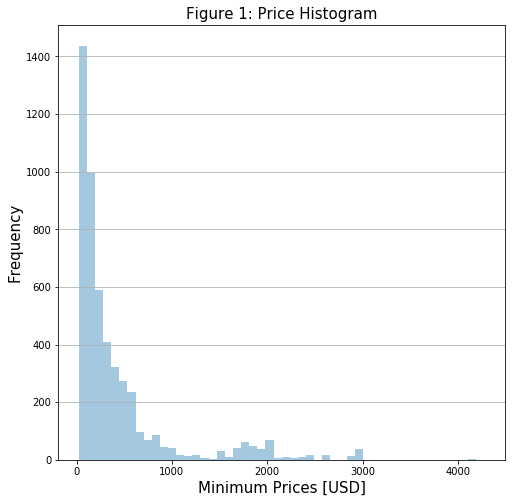

In [117]:
plt.figure(figsize = (8,8))
sns.distplot(eda_df['MinPrice'], bins = 50, kde = False)
#plt.hist(eda_df['MinPrice'], bins = 50)
plt.title('Figure 1: Price Histogram', size = 15)
plt.xlabel('Minimum Prices [USD]', size = 15)
plt.ylabel('Frequency', size = 15)
plt.grid(which = 'major', axis = 'y');

Figure 1 above showcases the histogram of our pricing data for our study. There is a dominating right skew in our dataframe, which is typically expected with most pricing data. Outliers will generally sway more towards the right of our data. Astonishingly, some prices collected were upwards of \$1,000 and a small increase of frequency appears leading up to the \$2,000 range for a ticket. Through some subject matter knowledge on dealing with personal accounts of travel, it is known that flights can be very expensive if a route is rare, difficult to travel, or has very popular origin and destination airports where hanger costs could be astronomical. To understand how a price exists above \$4,000 or even how there are some common price trends observed near the \$2,000 range is out of our subject matter knowledge. These APIs are accommodating accurate data from various domains, so we can state that the pricing is legitimate. In this case the \$4,000  may have some grounds to be considered to be an outlier, but we will not remove it for our study due to its legitimacy in price gathered. The small rise in the \$2,000 range is not considered to be an outlier. 

Automatically the overall consensus of our model will be combatting a right skew in pricing and we will see more bias trending towards lower prices. 

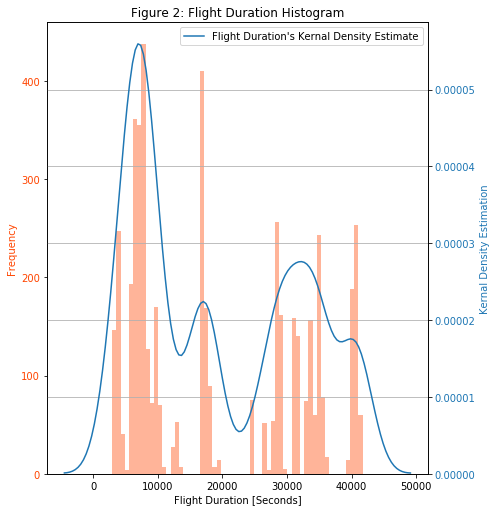

In [118]:
#Credit from here: https://matplotlib.org/gallery/api/two_scales.html

fig, ax1 = plt.subplots(figsize = (7,7))


color = 'orangered' #sets the color of the distribution
ax1.set_ylabel('Frequency', color = color) #sets the y label with the associated color
sns.distplot(eda_df['flight_duration'], bins = 60, kde = False, ax = ax1, color = color) #distribution plot without a kernal density estimation all on ax1
ax1.set_xlabel('Flight Duration [Seconds]') #sets the x label with the associated color
ax1.tick_params(axis = 'y', labelcolor = color) #sets the color of the tick parameters

ax2 = ax1.twinx() #copies the y axis keeps x the same

color = 'tab:blue' #sets the color of the next plot
ax2.set_ylabel('Kernal Density Estimation', color = color) #sets the y label with the associated color
sns.kdeplot(eda_df['flight_duration'], ax = ax2, color = color, label = 'Flight Duration\'s Kernal Density Estimate') #kernal density plot on ax2
ax2.tick_params(axis = 'y', labelcolor = color) #sets the color of the tick parameters

fig.tight_layout() #does something
plt.grid(which = 'major', axis = 'y') #adds grid lines
plt.title('Figure 2: Flight Duration Histogram') #plot title
plt.show(); #idk what this does...shows the plot?

Figure 2 shows the histogram of the flight duration in our data represented in seconds. The more common frequencies observed were flights averaging around 7,000 seconds which equates to approximately 2 hour flights. This would make sense when also considering the data observed in the below histogram (Figure 3), as a majority of the flights were domestic. There were a handful of flights which were international and would explain the largest flight durations of up in the 30,000 second ranges. As there weren't enough flights collected in general for this study (as well of understanding geographical divides between continenets), it isn't surprising to see the broken up pattern of our histogram. 

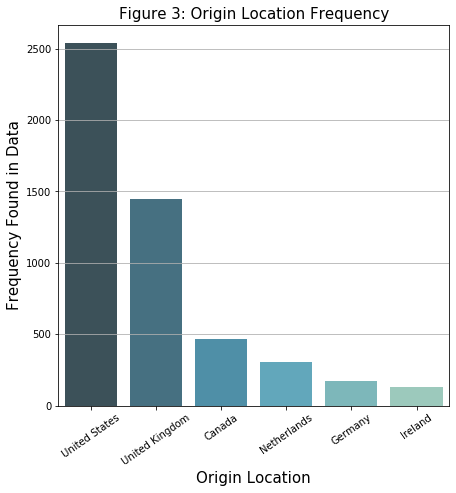

In [119]:
plt.figure(figsize = (7,7))
sns.barplot(x = eda_df['OriginCountryName'].value_counts().index, y = eda_df['OriginCountryName'].value_counts()[:], palette= "GnBu_d")
#plt.bar(eda_df['OriginCountryName'].value_counts().index, eda_df['OriginCountryName'].value_counts()[:])
plt.title('Figure 3: Origin Location Frequency', size = 15)
plt.xlabel('Origin Location', size = 15)
plt.ylabel('Frequency Found in Data', size = 15)
plt.xticks(rotation = 35)
plt.grid(which = 'major', axis = 'y');

Figure 3 showcases the geographical biases of our data. As previously stated, the majority of our data incorporates domestic flights only. From the above, we are seeing about 2,500 domestic flights. The next most popular origin country is the United Kingdom with a little over 1,500 trans-Atlantic flights. We must note that none of the flights shown here are trans-Pacific flights. This may be something we will wish to include in our data. With most flights being domestic, we can infer that this is a reason why most of the flights in our pricing histogram are lower priced relative to each other.   

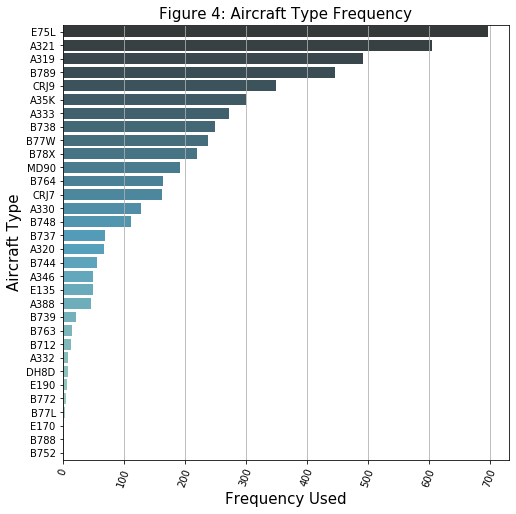

In [120]:
plt.figure(figsize = (8,8))
sns.barplot(x = eda_df['aircrafttype'].value_counts(ascending = False)[:], y = eda_df['aircrafttype'].value_counts(ascending = False).index, palette = 'GnBu_d')
plt.title('Figure 4: Aircraft Type Frequency', size = 15)
plt.xticks(rotation = 70)
plt.xlabel('Frequency Used', size = 15)
plt.ylabel('Aircraft Type', size = 15)
plt.grid(which = 'major',axis = 'x');

Narrative

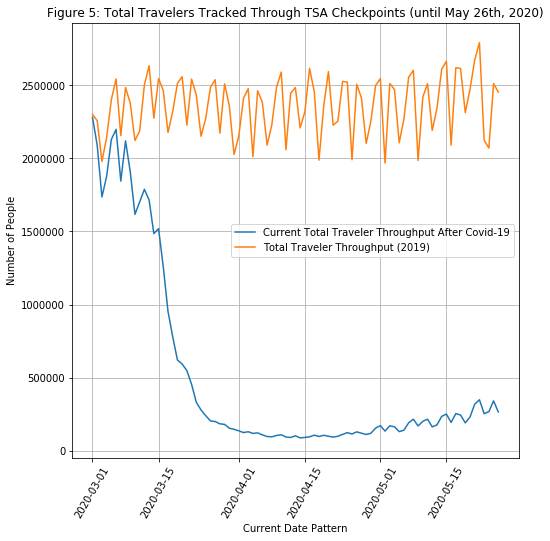

In [121]:
plt.figure(figsize = (8,8))

sns.lineplot(x = tsa_checkpoint['Date'], y = tsa_checkpoint['Total Traveler Throughput'])
sns.lineplot(x = tsa_checkpoint['Date'], y = tsa_checkpoint['Total Traveler Throughput (1 year ago - same weekday)'])

plt.grid(which = 'major', axis = 'both')
plt.xlabel('Current Date Pattern')
plt.ylabel('Number of People')
plt.legend(['Current Total Traveler Throughput After Covid-19', 'Total Traveler Throughput (2019)'], loc = 'center right')
plt.title('Figure 5: Total Travelers Tracked Through TSA Checkpoints (until May 26th, 2020)')
plt.xticks(rotation = 60);

Narrative

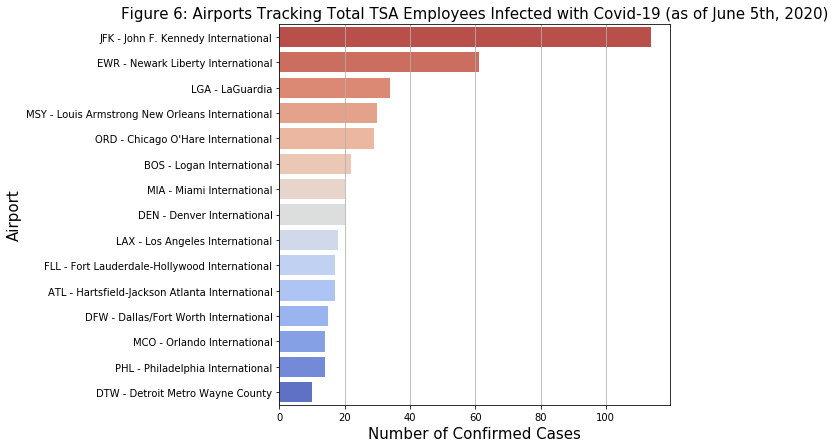

In [122]:
plot_order = tsa_confirmed.sort_values(by= 'Total Confirmed Cases', ascending = False)
new_plot_order = plot_order[plot_order['Total Confirmed Cases'] >= 10]
plt.figure(figsize = (7,7))
sns.barplot(x = new_plot_order['Total Confirmed Cases'], y = new_plot_order['Airport'], palette = 'coolwarm_r')#'GnBu_d')
plt.title('Figure 6: Airports Tracking Total TSA Employees Infected with Covid-19 (as of June 5th, 2020)', size = 15)
plt.xticks(rotation = 0)
plt.xlabel('Number of Confirmed Cases', size = 15)
plt.ylabel('Airport', size = 15)
plt.grid(which = 'major',axis = 'x');

Narrative

Do some EDA on the quotes observed from the bootstrap (particularly the pricing density across different flight combinations). 

Do some EDA on the amount of flight combinations themselves. 

# 5.00 Modeling

## 5.01 Modeling Preparation

In [123]:
target = 'MinPrice'

X_original = model_df.drop(columns = target)
y_original = model_df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X_original,
    y_original,
    random_state=random_state_value)

## 5.02 Training Models

### Baseline Model

In [124]:
training_baseline = [y_train.mean() for element in y_train]
print(f"The training baseline mean absolute error is: {mean_absolute_error(y_train, training_baseline)}")

testing_baseline = [y_test.mean() for element in y_test]
print(f"The testing baseline mean absolute error is: {mean_absolute_error(y_test, testing_baseline)}")

The training baseline mean absolute error is: 367.78841018849226
The testing baseline mean absolute error is: 339.68577168835634


The baseline model for our predictions has a mean absolute error of ~368 dollars. This is discovered by only guessing the mean in our training data. This wouldn't be considered a great model as a price difference of nearly $368 for any ticket is a very large amount. Kruze may be overcharging for flights using this knowledge, or may be undercharging other flights.    

### Linear Regression

In [125]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

linearpreds = linreg.predict(X_train) #predicts the dependent vairbale of the linear regression model using the training dataframe

print(f"The Mean Absolute Error of the above model for training is: {mean_absolute_error(y_train, linearpreds)}")

linearpreds = linreg.predict(X_test) #predicts the dependent vairbale of the linear regression model using the training dataframe

print(f"The Mean Absolute Error of the above model for testing is: {mean_absolute_error(y_test, linearpreds)}")

print(f"The average 5-fold cross validation score is: {np.abs(cross_val_score(linreg, X_original, y_original, scoring = 'neg_mean_absolute_error', cv = 5).mean())}")

The Mean Absolute Error of the above model for training is: 123.45301831918574
The Mean Absolute Error of the above model for testing is: 181653020.8915098
The average 5-fold cross validation score is: 65161825292.70602


Our linear regression model did better than our baseline on the training data. However, the model is overall terrible and is likely be the worst model of the various models pursued, without knowing what the others will look like. It was subtly and internally hypothesized that the linear regression model would outperform other models, but this may not be the case.   

### KNN Regression

In [126]:
#KNN Regression
knnr = KNeighborsRegressor()
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

knnr.fit(X_train_sc, y_train)

knnrpreds = knnr.predict(X_train_sc) #predicts the dependent vairbale of the KNN regression model using the training dataframe


print(f"The Mean Absolute Error of the above model for training is: {mean_absolute_error(y_train, knnrpreds)}")

knnrpreds = knnr.predict(X_test_sc) #predicts the dependent vairbale of the KNN regression model using the training dataframe
knnrtestresids = y_test - knnrpreds #calculates the training residuals

print(f"The Mean Absolute Error of the above model for testing is: {mean_absolute_error(y_test, knnrpreds)}")

print(f"The average 5-fold cross validation score is: {np.abs(cross_val_score(knnr, X_original, y_original, scoring = 'neg_mean_absolute_error', cv = 5).mean())}")

The Mean Absolute Error of the above model for training is: 214.94786505007906
The Mean Absolute Error of the above model for testing is: 244.87430830039526
The average 5-fold cross validation score is: 250.8824236559896


The KNN Regression model did a little worse in the training, but maintained consistency within the testing. Its cross validation score was also fairly consistent. It could be that this model would serve well in its consistent precision and would only need fine tuning to be better. Nonetheless, a $200-250 spread in pricing is not very helpful for Kruze's startup process.

### Bagging Regression 

In [127]:
#Bagging Decision trees
bagr = BaggingRegressor()
bagr.fit(X_train, y_train)

bagrpreds = bagr.predict(X_train)

print(f"The Mean Absolute Error of the above model for training is: {mean_absolute_error(y_train, bagrpreds)}")

bagrpreds = bagr.predict(X_test)

print(f"The Mean Absolute Error of the above model for testing is: {mean_absolute_error(y_test, bagrpreds)}")

print(f"The average 5-fold cross validation score is: {np.abs(cross_val_score(bagr, X_original, y_original, scoring = 'neg_mean_absolute_error', cv = 5).mean())}")

The Mean Absolute Error of the above model for training is: 33.77158671586716
The Mean Absolute Error of the above model for testing is: 80.91388669301712
The average 5-fold cross validation score is: 171.97995591966625


The Bagging Regression model seemed to perform well and better than most of the model shown here. The difference in mean absolute error scores show a lesser spread than other models. The cross validation is vastly different from the other scores, but relatively low nonetheless.

### Decision Tree Regression

In [130]:
#DecisionTree Regression
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

dtrpreds = dtr.predict(X_train)
dtrtrainresids = y_train - dtrpreds

print(f"The Mean Absolute Error of the above mode for training is: {mean_absolute_error(y_train, dtrpreds)}")

dtrpreds = dtr.predict(X_test)
dtrtrainresids = y_test - dtrpreds

print(f"The Mean Absolute Error of the above model for testing is: {mean_absolute_error(y_test, dtrpreds)}")

print(f"The average 5-fold cross validation score is: {np.abs(cross_val_score(dtr, X_original, y_original, scoring = 'neg_mean_absolute_error', cv = 5).mean())}")

The Mean Absolute Error of the above mode for training is: 0.10411175540326832
The Mean Absolute Error of the above model for testing is: 90.35494071146245
The average 5-fold cross validation score is: 188.26284252667298


The Decision Tree Regression model showed an suspiciously outstanding mean absolute error score on the training data. It only has a mean absolute error score of 10 cents, which is relatively amazing. However, it did not perform well to new data with a dramatic difference of nearly 100 dollars, when observing the testing data. The cross validation was even worse. The spread on the scores is concerning for this model. 

### Random Forest Regressor

In [132]:
#RandomForest Regression
rfr = RandomForestRegressor(criterion = 'mae')
rfr.fit(X_train, y_train)

rfrpreds = rfr.predict(X_train)
rfrtrainresids = y_train - rfrpreds

print(f"The Mean Absolute Error of the above mode for training is: {mean_absolute_error(y_train, rfrpreds)}")

rfrpreds = rfr.predict(X_test)
rfrtrainresids = y_test - rfrpreds

print(f"The Mean Absolute Error of the above model for testing is: {mean_absolute_error(y_test, rfrpreds)}")

print(f"The average 5-fold cross validation score is: {np.abs(cross_val_score(rfr, X_original, y_original, scoring = 'neg_mean_absolute_error', cv = 5).mean())}")

KeyboardInterrupt: 

## 5.03 Model Selection and Evaluation

The model we decided to go with as our best model is the Bagging Regression model. Although the training score did not perform the best across other models, it performed second best and showed that it could handle new data better than other models when analyzing the the testing score. Its 5-fold cross validation score was also better than other cross validation scores observed. We particularly analyzed the difference of scores for each model rather than just the Mean Absolute Error on its own. Ideally we want to have a model that is consistently precise in its predictions rather than a model that does exceptionally well for only one subset of data at a time. 

The bagging regressor model is an ensemble model which fits base regressors on different random subsets of data from the original dataset and aggregates their predictions. It will generally combat the higher variance found in Decision Tree models by introducing randomization into its construction. [Source](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html).

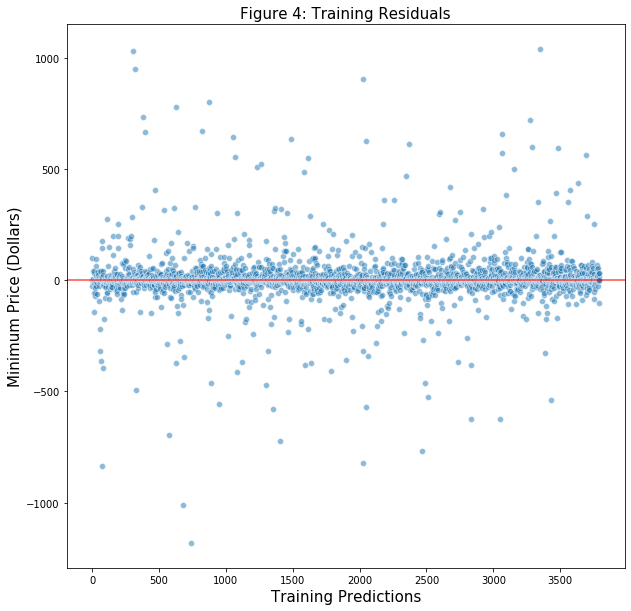

In [190]:
#Bagging Decision trees
bagr = BaggingRegressor()
bagr.fit(X_train, y_train)

bagrtrainpreds = bagr.predict(X_train)
bagrtrainresids = y_train - bagrtrainpreds #calculates the training residuals
bagrtestpreds = bagr.predict(X_test)
bagrtestresids = y_test - bagrtestpreds #calculates the training residuals



plt.figure(figsize = (10,10)) #sets figure size
plt.axhline(0, c = "r", alpha = .7) #sets the opacity and color red for the line
sns.scatterplot(x = range(len(bagrtrainpreds)),y = bagrtrainresids, alpha = .5) #sets the opacity and plots a scatter plot
plt.title('Figure 4: Training Residuals', size = 15) #
plt.xlabel('Training Predictions', size = 15)
plt.ylabel('Minimum Price [Dollars]', size = 15);

In the above figure, we can observe the residuals from our training model do not follow any specific pattern and show an even spread with a few outliers existing. The majority of our residuals are close together along the horizontal axis line, which is a good performance sign for our model. The mean absolute error on our training data has circulated around $30, changing with every run due to the random nature of the bagging regressor to begin with. In general with each run, we continuously found the scores to be similar when our data is split on the `random_state_value`. 

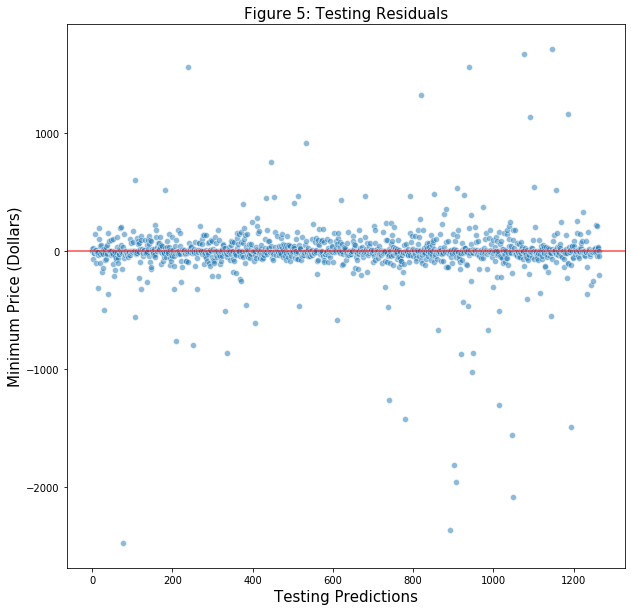

In [191]:
bagrtestpreds = bagr.predict(X_test)
bagrtestresids = y_test - bagrtestpreds #calculates the training residuals



plt.figure(figsize = (10,10)) #sets figure size
plt.axhline(0, c = "r", alpha = .7) #sets the opacity and color red for the line
sns.scatterplot(x = range(len(bagrtestpreds)),y = bagrtestresids, alpha = .5) #sets the opacity and plots a scatter plot
plt.title('Figure 5: Testing Residuals', size = 15) #
plt.xlabel('Testing Predictions', size = 15)
plt.ylabel('Minimum Price (Dollars)', size = 15);

The above Figure 5 is the residual plot for our testing residuals. There is an even spread among the residuals with a few outliers and most of the data sticks along the horizontal axis line. The spread is a little larger than that in the previous residual plot shown in Figure 4, which visually explains why the mean absolute error score is increased from approximately $30 to $80 dollars. However, overall the model does not perform overly poor. It can predict pricing to fair degree of accuracy for flights based of several different features. 

# 6.00 Conclusions and Future Work

The model performed well, but there was a great cost to the performance of this model. We must remember that:

- this study was conducted during the Covid-19 pandemic where data gathered was affecting domain

- the prices were bootstrapped in a manner where some Carrier Id's do not accurately depict the true carrier of a flight

- we are using past flights performed to predict future flight pricing. Coordination on this end would be needed for more accurate models (considering grabbing future quotes first, then grabbing flight data to search upon for each quote when the flight occurs.)

- there are many skews in our data and biases including geographical location limitations, dominating imbalances in different categorical types, risk of overfitting.

With such mentions above, which isn't inclusive of naming all of the various issues across this study, there is much future work to be done to create a better model and create a better platform for Kruze. For the future, some considerations would be to incorporate more relevant features, such as: jet fuel pricing, passenger data, jet engine analysis, more routes, travel trends, seasonality, housing prices of planes, and more. The project was semi-successful in that it showcases a minimum proof of concept, but fails to serve as a reliable model for price prediction. 

# 7.00 References

- [FlightAware.com](https://flightaware.com)

- [FlightXML2 Documentation](https://flightaware.com/commercial/flightxml/explorer/#op_AirlineFlightInfo)

- [suds Package](https://docs.inductiveautomation.com/display/DOC79/SUDS+-+Library+Overview)

- [Flights.com](https://www.flights.com/flights/new-york-jfk-to-miami-mia/)

- [Airports Shut Down due to Covid-19 Pandemic](https://www.businessinsider.com/coronavirus-airports-and-faa-centers-temporarily-closed-for-cleaning-2020-3#chicagos-midway-international-airport-1)

- [RapidAPI.com](https://rapidapi.com)

- [Skyscanner Flight Search API](https://rapidapi.com/search/skyscanner)

- [Skyscanner.com](https://www.skyscanner.com/about-us)

- [Skyscanner's official documentation for their travel APIs](https://skyscanner.github.io/slate/#getting-started) 

- [`requests` Package](https://realpython.com/python-requests/)

- [FlightAware Discussions Source](https://discussions.flightaware.com/t/airlineflightschedules-ident-and-actual-ident-not-matching/59284)

- [Codeshare Flights](https://thepointsguy.com/guide/what-are-codeshare-flights-and-how-do-they-work/)

- [IATA and ICAO codes](https://aviation.stackexchange.com/questions/8767/when-do-we-use-iata-codes-and-when-do-we-use-icao-codes)

- [MNAR](https://www.theanalysisfactor.com/missing-data-mechanism/)

- [Bagging Regressor Tool from Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html)

Consider adding [this command](https://notify.run) into your random forrest modeling process and general modeling process to go about a proper gridsearch of values as well as cover all of your bases. Must add more references regarding TSA data and must add  